# Tesseract demo

To be able to use this code on your machine, you will need to have the packages tesseract (for OCR) and pytesseract (tesseract python bindings) installed. If you are working in colab, the next code cell will set up your environment.

You can install pytesseract by running the following command in your terminal:

```
pip3 install --user pytesseract
```

More information can be found at: https://pypi.org/project/pytesseract/ and https://en.wikipedia.org/wiki/Tesseract_(software)


In [42]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Base package
  !apt install tesseract-ocr
  # Swedish language model
  !apt install tesseract-ocr-swe
  # Python bindings
  !pip install pytesseract
  # git repo with images and some more code
  !git clone https://github.com/fredrikwahlberg/5LN721.git
  # Enter the repo folder
  %cd 5LN721

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-swe is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Cloning into '5LN721'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 93 (delta 8), reused 15 (delta 4), pack-reused 72
Unpacking objects: 100% (93/93), done.
/content/5LN721/5LN721/5LN721


Now we import some modules that will come in handy.

In [43]:
import cv2                      # Computer Vision
import numpy as np              # Vector math
import pytesseract              # OCR
import os.path                  # File system stuff
import matplotlib.pyplot as plt # Plotting, the line after this one is only for jupyter notebook
%matplotlib inline

## Reading an image with text

The first thing we need to do is read in a image to perform OCR on. All the files that will be loaded thoughout this notebook can be found in the course repository.

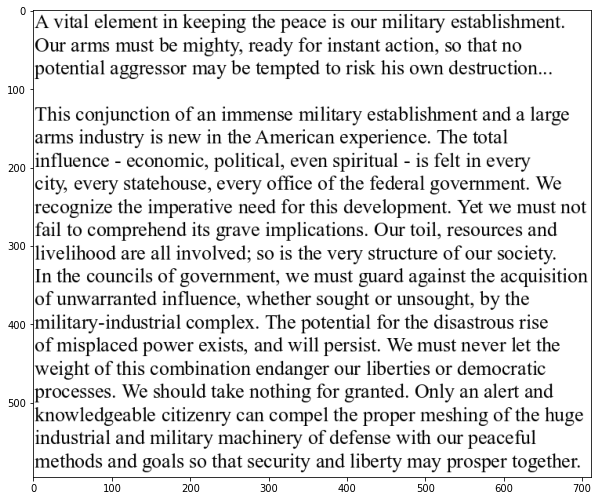

In [44]:
image_with_text = cv2.imread("Eisenhower.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.imshow(image_with_text, cmap='gray')
plt.show()

Maybe you recognise the speech. It was very prophetic.

The next step is to call tesseract, wich should return the text in the image as a string.

In [45]:
extracted_text = pytesseract.image_to_string(image_with_text)
print(extracted_text)

A vital element in keeping the peace is our military establishment.
Our arms must be mighty, ready for instant action, so that no
potential aggressor may be tempted to risk his own destruction...

This conjunction of an immense military establishment and a large
arms industry is new in the American experience. The total
influence - economic, political, even spiritual - is felt in every

city, every statehouse, every office of the federal government. We
recognize the imperative need for this development. Yet we must not
fail to comprehend its grave implications. Our toil, resources and
livelihood are all involved; so is the very structure of our society.

In the councils of government, we must guard against the acquisition
of unwarranted influence, whether sought or unsought, by the
military-industrial complex. The potential for the disastrous rise

of misplaced power exists, and will persist. We must never let the
weight of this combination endanger our liberties or democratic
processe

To be able to compare the OCRed text to some ground truth, the speech is also included in the repository as plain text.

In [46]:
with open("Eisenhower.txt", 'r') as file:
    original_text = file.read()

print(original_text)

A vital element in keeping the peace is our military establishment.
Our arms must be mighty, ready for instant action, so that no 
potential aggressor may be tempted to risk his own destruction...

This conjunction of an immense military establishment and a large 
arms industry is new in the American experience. The total 
influence - economic, political, even spiritual - is felt in every 
city, every statehouse, every office of the federal government. We 
recognize the imperative need for this development. Yet we must not 
fail to comprehend its grave implications. Our toil, resources and 
livelihood are all involved; so is the very structure of our society.
In the councils of government, we must guard against the acquisition
of unwarranted influence, whether sought or unsought, by the 
military-industrial complex. The potential for the disastrous rise 
of misplaced power exists, and will persist. We must never let the 
weight of this combination endanger our liberties or democratic 


Does the ground truth and the OCRed text match?

## Testing the quality

A common metric of quality of the OCR is the word error rate, i.e. the number of non-recognised words in relation to the total number of words. This can be done by flexibly matching the original text with the text returned from the OCR.

The code shown below uses cython for speed in the Levenshtein calculations. You must have the cython package installed to use this code as it needs to do some compiling on your machine.

In [47]:
from levenshtein import wer, cer
print(wer.__doc__)
print(cer.__doc__)


    Word Error Rate (WER) using Levenshtein distance

    Parameters
    ----------
    lhs : str
    rhs : str

    Returns
    -------
    errors : int
    error_rate: float

    Examples
    --------
    > wer("bacon spam spam", "spam spam")
    (1, 0.3333333333333333)
    

    Character Error Rate (WER) using Levenshtein distance

    Parameters
    ----------
    lhs : str
    rhs : str

    Returns
    -------
    errors : int
    error_rate: float

    Examples
    --------
    > cer("bacon spam spam", "spam spam")
    (6, 0.4)
    


In [48]:
print(original_text.split()[:20])
print(extracted_text.split()[:20])
we = wer(original_text, extracted_text)
print("Word errors:", we)
print("WER: %f" % we[1])

['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
Word errors: (0, 0.0)
WER: 0.000000


In [49]:
print(list(original_text)[:20])
print(list(extracted_text)[:20])
ce = cer(original_text, extracted_text)
print("Character errors:", ce)
print("CER: %f" % ce[1])

['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
Character errors: (16, 0.01263823064770932)
CER: 0.012638


## A slightly harder example

This image is from an old encyclopedia.

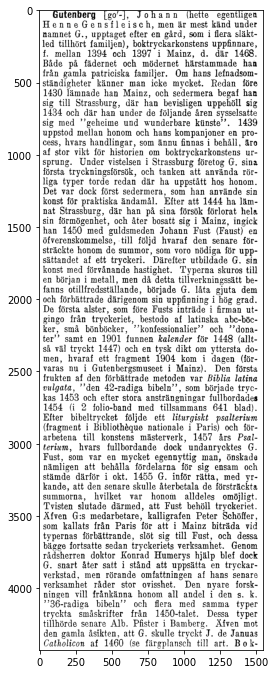

In [50]:
image_with_text = cv2.imread("Gutenberg.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 12))
plt.imshow(image_with_text, cmap='gray')
plt.show()

We need some ground truth data again.

In [51]:
with open("Gutenberg.txt", 'r', encoding='utf-8') as file:
    original_text = file.read()
print(original_text)

Gutenberg [go’-], Johann (hette egentligen 
Henne Gensfleisch, men är mest känd under 
namnet G., upptaget efter en gård, som i flera 
släktled tillhört familjen), boktryckarkonstens 
uppfinnare, f. mellan 1394 och 1397 i Mainz, 
d. där 1468. Både på fädernet och mödernet 
härstammade han från gamla patriciska 
familjer. Om hans lefnadsomständigheter 
känner man icke mycket. Redan före 1430 
lämnade han Mainz, och sedermera begaf han sig 
till Strassburg, där han bevisligen uppehöll 
sig 1434 och där han under de följande åren 
sysselsatte sig med "geheime und wunderbare 
künste". 1439 uppstod mellan honom och hans 
kompanjoner en process, hvars handlingar, 
som ännu finnas i behåll, äro af stor vikt för 
historien om boktryckarkonstens ursprung. Under 
vistelsen i Strassburg företog G. sina första 
tryckningsförsök, och tanken att använda rörliga 
typer torde redan där ha uppstått hos honom. Det 
var dock först sedermera, som han använde sin 
konst för praktiska ändamål. Efter att 144

Now for extracting the text and calculating the error rates.

In [52]:
extracted_text = pytesseract.image_to_string(image_with_text)

we = wer(original_text, extracted_text)
print("Word errors:", we)
print("WER: %f" % we[1])

ce = cer(original_text, extracted_text)
print("Character errors:", ce)
print("CER: %f" % ce[1])

Word errors: (163, 0.318359375)
WER: 0.318359
Character errors: (322, 0.0970464135021097)
CER: 0.097046


OCR can incorporate knowledge of language in the recognition. Let's try OCR with a language model for Swedish.

In [53]:
extracted_text = pytesseract.image_to_string(image_with_text, lang='swe')

we = wer(original_text, extracted_text)
print("Word errors:", we)
print("WER: %f" % we[1])

ce = cer(original_text, extracted_text)
print("Character errors:", ce)
print("CER: %f" % ce[1])

Word errors: (59, 0.11545988258317025)
WER: 0.115460
Character errors: (178, 0.05364677516576251)
CER: 0.053647


Unsurprisingly, the error rate for words in greatly improved.

## Showing the layout

The image given to tesseract goes though layout analysis (as discussed in the lecture) before returning a string. We can get this data from tesseract if we ask for it.

First, the image will be cropped for simplifying the example.

In [54]:
img_cropped = image_with_text[:1020, :]
data = pytesseract.image_to_boxes(img_cropped)

Now for plotting bounding boxes for all the recognised characters.

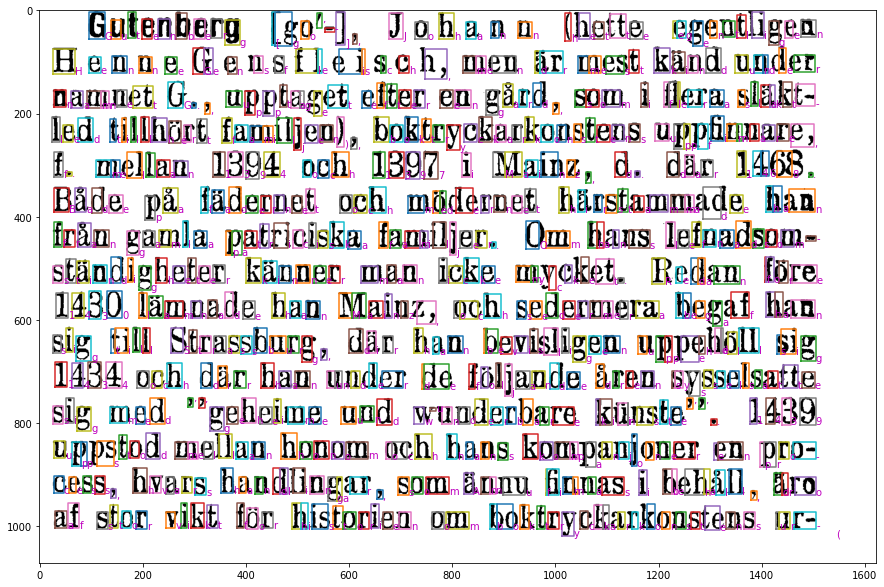

In [55]:
plt.figure(figsize=(15, 15))
plt.imshow(img_cropped, cmap='gray')
for entry in data.split("\n"):
  if len(entry) > 0:
    char, y1, x1, y2, x2, _ = entry.split()
    y1 = int(y1)
    y2 = int(y2)
    x1 = img_cropped.shape[0]-int(x1)
    x2 = img_cropped.shape[0]-int(x2)
    plt.plot([y1, y2, y2, y1, y1], [x1, x1, x2, x2, x1]) # Plot the box
    plt.text(y2, x1, char, color='m') # Plot the OCRed character
plt.show()

Nice!